# Implementation Of ANN In Keras

# Importing nacessary library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Q1

In [3]:
print("TensorFlow Version :",tf.__version__)
print("Keras Version :",tf.keras.__version__)

TensorFlow Version : 2.12.0
Keras Version : 2.12.0


# Q2

In [4]:
wine_data = pd.read_csv('/content/wine.csv')
print("Dimensions of the Wine Quality dataset:",wine_data.shape)

Dimensions of the Wine Quality dataset: (1599, 12)


# Q3

In [19]:
print("Null Values : ",wine_data.isnull().sum())
wine_data['quality'].replace("good",1,inplace=True)
wine_data['quality'].replace("bad",0,inplace=True)
wine_data['quality'].astype(int)





Null Values :  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [20]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Q4

In [21]:
features = wine_data.drop(columns=['quality'])
target = wine_data['quality']

# Q5

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Q6

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Q7 and Q8

In [25]:
input_dim = X_train_scaled.shape[1]  # Number of features
model = Sequential([
layers.Dense(units=64,activation='relu',input_shape=(input_dim,)), # Input layer
layers.Dense(units=128,activation='relu'),  # Hidden layer 1
layers.Dense(units=64, activation='relu'),   # Hidden layer 2
layers.Dense(units=1, activation='sigmoid'),  # Output layer
])

# Q9

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


# Q10 and Q11

In [27]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

# Q12

In [28]:
history = model.fit(X_train_scaled,y_train,epochs=50,batch_size=32,validation_data=(X_val_scaled,y_val))

Epoch 1/50
40/40 [==============================] - 2s 6ms/step - loss: 0.6074 - accuracy: 0.6669 - val_loss: 0.5430 - val_accuracy: 0.7109
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7443 - val_loss: 0.5212 - val_accuracy: 0.7109
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7568 - val_loss: 0.5437 - val_accuracy: 0.7031
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7662 - val_loss: 0.5109 - val_accuracy: 0.7344
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7764 - val_loss: 0.5110 - val_accuracy: 0.7383
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7795 - val_loss: 0.5065 - val_accuracy: 0.7188
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7881 - val_loss: 0.5150 - val_accuracy: 0.7500
Epoch 8/50
40/40 [==

# Q13

In [30]:
model_weights = model.get_weights()

# Q14

In [31]:
history_df = pd.DataFrame(history.history)

# Q15

## Plot training & validation accuracy values

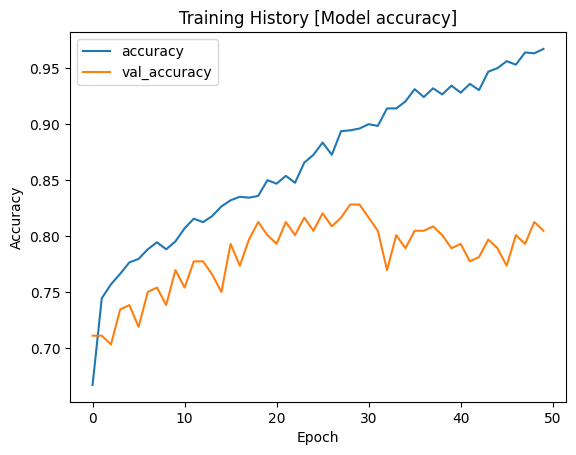

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training History [Model accuracy]')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

## Plot training & validation loss values

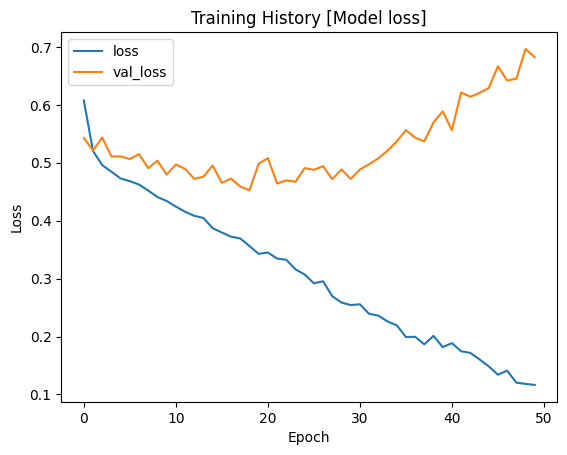

In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History [Model loss]')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# **Q16**

In [38]:
test_loss,test_accuracy = model.evaluate(X_test_scaled,y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 0s 9ms/step - loss: 0.9367 - accuracy: 0.7500
Test Loss: 0.9367035627365112
Test Accuracy: 0.75


# End